## Матрицы. Оптимизация.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [105]:
A = np.random.uniform(-10,10,size=(5,5))
A

array([[ 3.338,  5.509, -1.809,  1.473,  4.716],
       [ 5.519,  1.324, -2.545,  5.498, -9.478],
       [ 6.128,  3.817,  6.911, -9.902, -3.101],
       [-3.064, -5.413, -4.361,  3.641,  2.832],
       [ 0.422,  3.259, -3.805, -7.333,  5.079]])

In [113]:
A - 1

array([[  2.338,   4.509,  -2.809,   0.473,   3.716],
       [  4.519,   0.324,  -3.545,   4.498, -10.478],
       [  5.128,   2.817,   5.911, -10.902,  -4.101],
       [ -4.064,  -6.413,  -5.361,   2.641,   1.832],
       [ -0.578,   2.259,  -4.805,  -8.333,   4.079]])

### Представление изображений матрицами

In [114]:
img = cv2.imread("dsh_fall_sqr_small.JPG")
img.shape

(180, 150, 3)

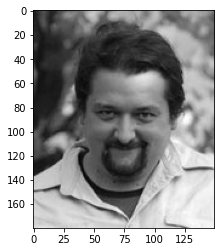

In [137]:
imgbw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img[:,:,::-1]
plt.imshow(imgbw,cmap='gray')

In [125]:
np.mean(img,axis=2).shape

(180, 150)

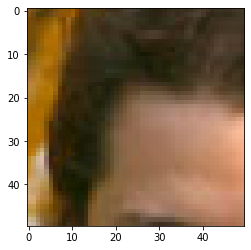

In [140]:
plt.imshow(img[30:80,30:80])

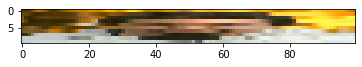

In [146]:
plt.imshow(cv2.resize(img,(100,10),cv2.INTER_LANCZOS4))

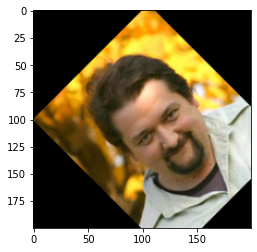

In [147]:
from math import sin,cos,pi

rot = lambda a: np.array([[cos(a), sin(a), 0],[-sin(a),cos(a),0]])
trans = lambda d : np.array([[0,0,d[0]],[0,0,d[1]]])

plt.imshow(cv2.warpAffine(img,rot(pi/4)+trans((0,100)),(200,200)))


### Видео. Обнаружение движения

In [148]:
cap = cv2.VideoCapture("motionvideo.mp4")
res = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret:
        res.append(frame[:,:,::-1])
    else:
        break
frames = np.array(res)

In [149]:
frames.shape

(876, 180, 320, 3)

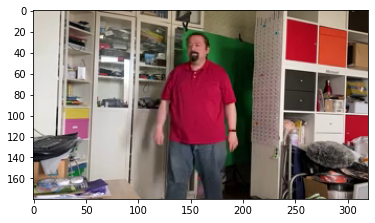

In [154]:
plt.imshow(frames[220])

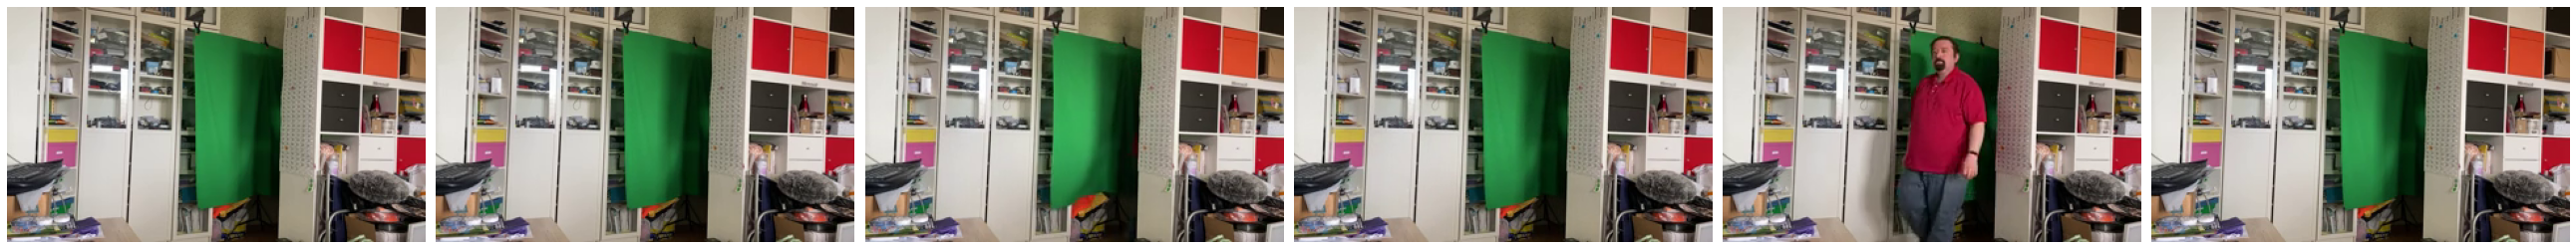

In [155]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

display_images(frames[::150])

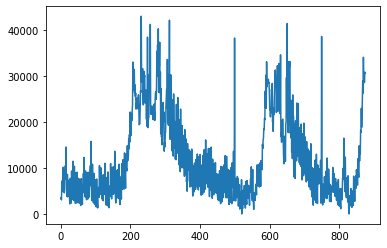

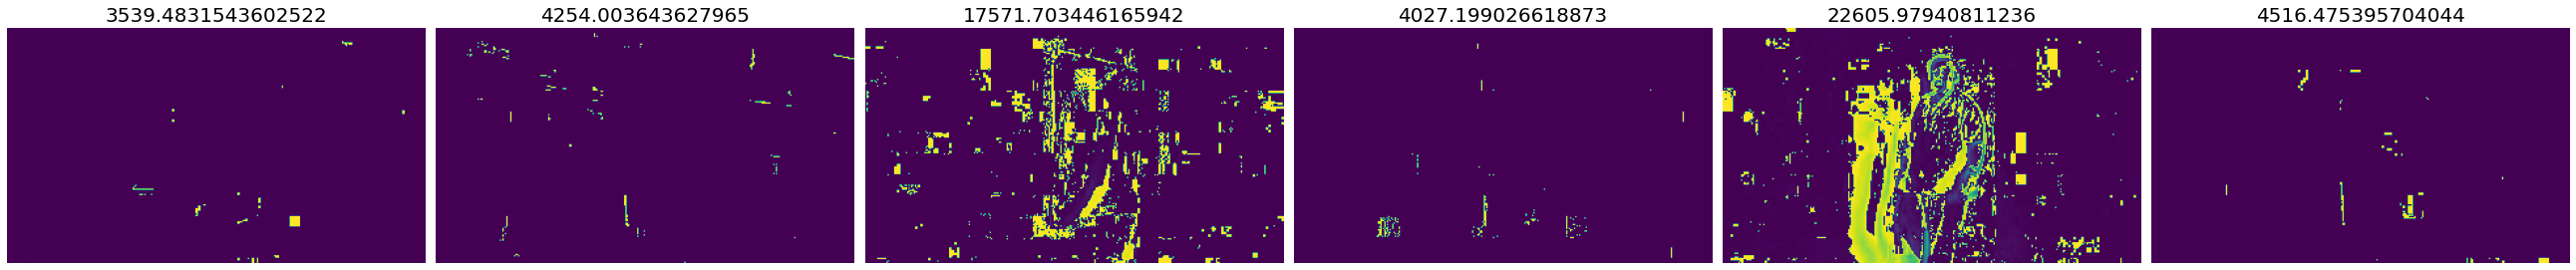

In [156]:
bwframes = [cv2.cvtColor(x,cv2.COLOR_BGR2GRAY) for x in frames]
diffs = [(p2-p1) for p1,p2 in zip(bwframes[:-1],bwframes[1:])]
diff_amps = np.array([np.linalg.norm(x) for x in diffs])
plt.plot(diff_amps)
display_images(diffs[::150],titles=diff_amps[::150],fontsize=20)

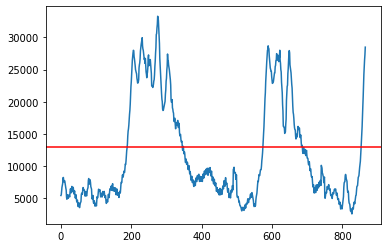

In [160]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

threshold = 13000

plt.plot(moving_average(diff_amps,10))
plt.axhline(y=threshold, color='r', linestyle='-')

In [161]:
active_frames = np.where(diff_amps>threshold)[0]

def subsequence(seq,min_length=30):
    ss = []
    for i,x in enumerate(seq[:-1]):
        ss.append(x)
        if x+1 != seq[i+1]:
            if len(ss)>min_length:
                return ss
            ss.clear()

sub = subsequence(active_frames)
print(sub)

[195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322]


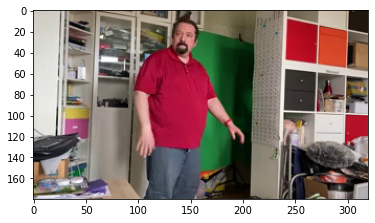

In [162]:
plt.imshow(frames[(sub[0]+sub[-1])//2])


### Системы линейных алгебраических уравнений (СЛАУ)

Рассмотрим систему уравнений:
$$
\begin{cases}
x_1+x_2+x_3 = 2 \\
2x_1+3x_2-x_3 = 5\\
x_1-x_2+x_3 = 0\\
\end{cases}
$$
Она может быть представлена в матричной форме
$$
\begin{pmatrix} 1 & 1 & 1 \\ 2 & 3 & -1 \\ 1 & -1 & 1\end{pmatrix} \times
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} 2 \\ 5 \\ 0 \end{pmatrix}
$$

In [171]:
np.set_printoptions(precision=3)

A = np.array([[1,1,1],[2,3,-1],[1,-1,1]],dtype=np.float32)
b = np.array([2,5,0],dtype=np.float32)

A = np.random.normal(size=(7,7))
b = np.random.normal(size=(7,))

In [172]:
x = np.linalg.inv(A)@b
x

array([-0.622,  0.201, -1.216,  0.261,  1.258,  0.416,  0.428])

In [168]:
A@x

array([ 2.000e+00,  5.000e+00, -1.192e-07], dtype=float32)

In [173]:
def diag(A,b):
  n = A.shape[0]
  for i in range(n):
    for j in range(i):
      coef = A[i,j]/A[j,j]
      A[i] = A[i]-coef*A[j]
      b[i] = b[i]-coef*b[j]
    b[i] = b[i]/A[i,i]
    A[i] = A[i]/A[i,i]

print(A,b)
diag(A,b)
print(A,b)

[[-1.018 -2.229  0.637 -0.495  0.701 -0.559  1.742]
 [-2.087 -0.076 -0.536 -2.124 -1.198 -0.841 -1.13 ]
 [-1.99   1.379  0.087 -0.566 -0.89   0.384 -0.817]
 [-1.877  0.908  0.564 -0.375  1.191 -0.195  0.412]
 [ 0.064  1.129 -1.886 -0.669 -1.563 -0.715 -0.155]
 [-0.322 -1.048 -0.131  0.193  0.611 -0.467 -1.727]
 [-1.073 -0.773  0.46   0.069 -0.105  1.352  1.791]] [ 0.677 -0.96  -0.048  2.161 -0.025  0.035  1.167]
[[  1.      2.19   -0.626   0.487  -0.689   0.55   -1.712]
 [  0.      1.     -0.41   -0.247  -0.586   0.068  -1.046]
 [  0.      0.      1.      1.524   0.925   0.912   1.492]
 [ -0.     -0.     -0.      1.     -3.52    1.926  -0.686]
 [  0.      0.      0.      0.      1.     -0.438   0.665]
 [  0.      0.      0.      0.      0.      1.    -67.758]
 [  0.      0.      0.      0.      0.      0.      1.   ]] [ -0.665  -0.522   1.363  -3.66    1.36  -28.581   0.428]


In [174]:
def solve(A,b):
    n = A.shape[0]
    for i in range(n-2,-1,-1):
        for j in range(i+1,n):
            coef = A[i,j]
            A[i]=A[i]-A[j]*coef
            b[i]=b[i]-b[j]*coef
solve(A,b)
A,b

(array([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]),
 array([-0.622,  0.201, -1.216,  0.261,  1.258,  0.416,  0.428]))

### Метод наименьших квадратов

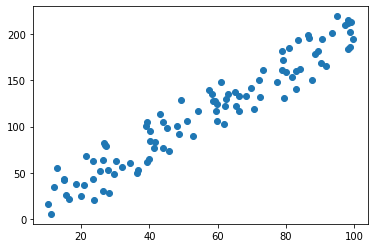

In [176]:
x = np.random.uniform(10,100,100)
y = 2*x+1+np.random.uniform(-30,30,100)
plt.scatter(x,y)

In [177]:
n = len(x)
a = (x.sum()*y.sum()-n*(x*y).sum())/(x.sum()**2-n*(x**2).sum())
b = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/(x**2).sum()/(n-x.sum())
print(a,b)

2.022523770740521 -0.0029426320888180173


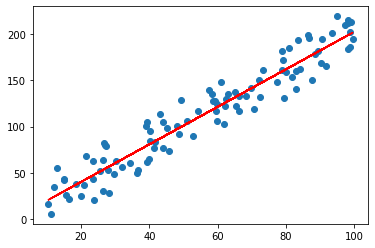

In [178]:
plt.scatter(x,y)
plt.plot(x,a*x+b,color='r')

## Оптимизация. Градиентный спуск

In [ ]:
f = lambda x,y : (x-2)**2 + (y+1)**2 + 5

In [ ]:
Xf,Yf = np.meshgrid(np.linspace(-10,10,50), np.linspace(-10,10,50))
Zf = f(Xf,Yf)
plt.contourf(Xf,Yf,Zf)

In [ ]:
def d(f,x,dx=0.1):
  return (f(x+dx)-f(x))/dx

dfdx = lambda x,y : d(lambda t : f(t,y),x)
dfdy = lambda x,y : d(lambda t : f(x,t),y)

x,y = -8,-8
X,Y = [],[]
eta = 0.1
for _ in range(10):
  X.append(x); Y.append(y)
  x-=eta*dfdx(x,y)
  y-=eta*dfdy(x,y)
  print(f"x={x}, y={y}, z={f(x,y)}")

In [ ]:
plt.contourf(Xf,Yf,Zf)
plt.scatter(X,Y)

### Оптимизация для регрессии

In [ ]:
x = np.random.uniform(10,100,100)
y = 2*x+1+np.random.uniform(-15,15,100)
plt.scatter(x,y)

In [ ]:
def loss(a,b):
    py = a*x+b
    return np.mean((y-py)**2)

loss(1,2)

In [ ]:
a,b = 0,0
A,B = [],[]
eta = 0.01
for _ in range(10):
    A.append(a); B.append(b)
    a-=eta*d(lambda x: loss(x,b),a)
    b-=eta*d(lambda x: loss(a,x),b)
    print(f"loss = {loss(a,b)}, a={a}, b={b}")

In [ ]:
plt.scatter(A,B)

In [ ]:
plt.scatter(x,y)
plt.plot(x,a*x+b,color='r')